In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Ice Cream Revenue
 - Simple sheet with two columns: Temperature and Earning in US$ per day

> ## What you can expect to see in this Jupyter Notebook:
 - In this analysis will be checked if those two variables are independent or not applying statistics knowledge, more speccifically chi-squared test ($\chi^2$). Like almost all studies, the result is not always what we expect, there is a plot twist at the end HAHAHA.

 - Null hypothesis: <br> 
 $H_{0}:$ variables are independents of each other

 - Alternative hypothesis:<br> 
 $H_{a}:$ variables are dependents of each other



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IceCreamData.csv')
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
df = df.sort_values('Revenue', ascending=False)
df


,Temperature,Revenue
444,45.000000,1000.000000
413,41.766589,969.291630
329,41.924446,965.493040
354,39.764129,935.717291
466,40.303768,926.067153
...,...,...
229,4.236465,118.812150
11,3.664670,71.160153
8,0.976870,55.390338
371,0.267028,32.546619


> First of all I chose to sort values on column temperature to make easier to plot a graph showing that both variable grow together. Something that makes sense, if is a hot day people will buy more ice cream.


In [ ]:
df = df.sort_values('Temperature')


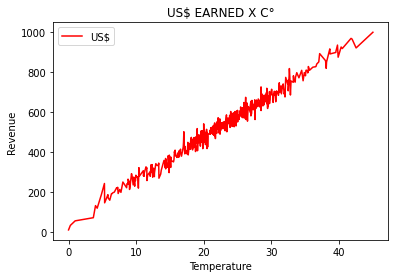

In [ ]:
plt.plot(df['Temperature'], df['Revenue'], 'r-', label='US$')
plt.title('US$ EARNED X C°')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.legend()

plt.show()

> Okay, with that graph we can assume that those variables are dependent in this case. But let's use some of knowledge of statistics.

> We will use $\chi^2$ test because we have a large amount of samples and we want to discover if temperature and revenue are correlated.

- I chose to use a 0.05 of significance level, if our p_value found in the final is higher than it we can refuse our null hypothesis, else we can not refuse it and must accept alternative hypothesis. 
- Our first step is to create a contingency table.


In [ ]:
table = pd.crosstab(df['Temperature'], df['Revenue'])
table


Revenue,10.000000,32.546619,55.390338,71.160153,118.812150,131.657017,145.625302,158.849806,170.237756,186.476487,...,898.805423,905.477604,916.648613,918.391232,921.508275,926.067153,935.717291,965.493040,969.291630,1000.000000
Temperature,,,,,,,,,,,,,,,,,,,,,
0.000000,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.267028,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.976870,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.664670,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.986523,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40.473989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
41.766589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41.924446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
chi_square, p_value, dof, freq = chi2_contingency(table)
print("P_value = ", p_value)

p_value = 1 - chi2.cdf(chi_square, dof)
print("P_value = ", p_value)

P_value =  0.23960320597650075
P_value =  0.23960320597650064


I realized that I needed to correct the data so that the contingency table would be correct

In [ ]:
# data = {
#     'Temperature':
#     [
#       '0>= and <=5',
#       '5> and <=10',
#       '10> and <=15',
#       '15> and <=20',
#       '20> and <=25',
#       '25> and <=30',
#       '30> and <=35',
#       '35> and <=40',
#       '40> and <=45'
#     ]
# }
# newdf = pd.DataFrame(data=data)

# sum = 0
# for temp in df['Temperature']:
#   if temp >= 0 and temp < 5:
#     sum += df['Revenue']
#     newdf


In [ ]:
labelstemp = [
      '>=0 and <=5',
      '>5 and <=10',
      '>10 and <=15',
      '>15 and <=20',
      '>20 and <=25',
      '>25 and <=30',
      '>30 and <=35',
      '>35 and <=40',
      '>40 and <=45'
    ]

df['Temperature Range'] = pd.cut(x=df['Temperature'], bins=[-0.001,5,10,15,20,25,30,35,40,45], labels=labelstemp)

labelsrev = [
      '>=0 and <=100',
      '>100 and <=200',
      '>200 and <=300',
      '>300 and <=400',
      '>400 and <=500',
      '>500 and <=600',
      '>600 and <=700',
      '>700 and <=800',
      '>800 and <=900',
      '>900 and <=1000',
      
    ]
df['Revenue Range'] = pd.cut(x=df['Revenue'], bins=[-0.001,100,200,300,400,500,600,700,800,900,1000], labels=labelsrev)
df

,Temperature,Revenue,Temperature Range,Revenue Range
402,0.000000,10.000000,>=0 and <=5,>=0 and <=100
371,0.267028,32.546619,>=0 and <=5,>=0 and <=100
8,0.976870,55.390338,>=0 and <=5,>=0 and <=100
11,3.664670,71.160153,>=0 and <=5,>=0 and <=100
63,3.986523,131.657017,>=0 and <=5,>100 and <=200
...,...,...,...,...
76,40.473989,918.391232,>40 and <=45,>900 and <=1000
413,41.766589,969.291630,>40 and <=45,>900 and <=1000
329,41.924446,965.493040,>40 and <=45,>900 and <=1000
17,42.515280,921.508275,>40 and <=45,>900 and <=1000


In [ ]:
table = pd.crosstab(df['Temperature Range'], df['Revenue Range'])
table


Revenue Range,>=0 and <=100,>100 and <=200,>200 and <=300,>300 and <=400,>400 and <=500,>500 and <=600,>600 and <=700,>700 and <=800,>800 and <=900,>900 and <=1000
Temperature Range,,,,,,,,,,
>=0 and <=5,4,3,0,0,0,0,0,0,0,0
>5 and <=10,0,10,23,0,0,0,0,0,0,0
>10 and <=15,0,0,22,33,0,0,0,0,0,0
>15 and <=20,0,0,0,24,70,5,0,0,0,0
>20 and <=25,0,0,0,0,30,81,5,0,0,0
>25 and <=30,0,0,0,0,0,27,81,3,0,0
>30 and <=35,0,0,0,0,0,0,16,30,2,0
>35 and <=40,0,0,0,0,0,0,0,2,20,3
>40 and <=45,0,0,0,0,0,0,0,0,0,6


In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
chi_square, p_value, dof, freq = chi2_contingency(table)
print("P_value = ", p_value)

p_value = 1 - chi2.cdf(chi_square, dof)
print("P_value = ", p_value)
print("chi_square = ", chi_square)


P_value =  0.0
P_value =  0.0
chi_square =  2326.1510366034126


I asked my teacher about the result and he told me some infos that I didn't remember. First of all, my contingency table has a lot of values under 5, and one of all requirements is that each entry need to be at least equal 5. Furthermore, temperature and revenue are continue variables, and they needed to be discrete. So, he told me in this case it might be more appropriate for me to compute the correlation between them and we are gonna do it right now! And if you are expect something WOW, no it is simple.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/IceCreamData.csv')

In [7]:
df.corr()


,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


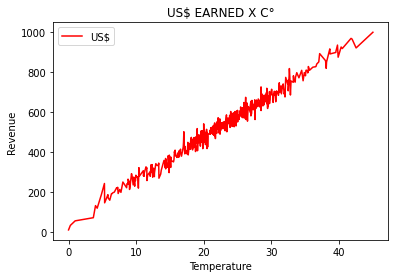

In [10]:
df = df.sort_values('Temperature')

plt.plot(df['Temperature'], df['Revenue'], 'r-', label='US$')
plt.title('US$ EARNED X C°')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.legend()

plt.show()

#RESULTS
> - If you read all of this studies you can see that I reached my objectives but not in the way that I wanted. I chose the wrong way to show if those variables has any kind of relation, but how I discovery that? I notice that the result was strange so I went to my teacher to have his opinion about it and he explained to me why I couldn't use Chi Square to solve my problem. He propose to me to use DataFrame.corr() from library pandas (Ok, it's simple sorry if you read everything).
- As we can see and compare with chart ploted, those variables are extremely correlated. Temperature and Revenue are two coeficients that in an Ice Cream Business will impact on the result. So, if your owner of an ice cream shop do not hesitate to open your sale point in a hot day.
 